In [ ]:
!pip install nltk scikit-learn pandas seaborn matplotlib



In [ ]:
! pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c

In [ ]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import reuters
import pandas as pd

# Define classes of interest
classes_of_interest = ['acq', 'corn', 'crude', 'earn', 'grain', 'interest', 'money-fx', 'ship', 'trade', 'wheat']

# Filter documents based on categories
documents = []
for category in classes_of_interest:
    category_docs = reuters.fileids(category)
    documents.extend([(doc_id, reuters.raw(doc_id), reuters.categories(doc_id)) for doc_id in category_docs])

df = pd.DataFrame(documents, columns=['Doc_ID', 'Content', 'Categories'])


In [ ]:
print(df)

             Doc_ID                                            Content  \
0        test/14843  SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERG...   
1        test/14852  BOND CORP STILL CONSIDERING ATLAS MINING BAIL-...   
2        test/14865  CRA SOLD FORREST GOLD FOR 76 MLN DLRS - WHIM C...   
3        test/14888  ANHEUSER-BUSCH JOINS BID FOR SAN MIGUEL\n  Anh...   
4        test/14900  MONIER SAYS BRITAIN'S REDLAND MAY BID FOR IT\n...   
...             ...                                                ...   
9974    training/97  ASCS TERMINAL MARKET VALUES FOR PIK GRAIN\n  T...   
9975  training/9773  IWC lifts 1986/87 world wheat, coarse grain es...   
9976  training/9782  IWC LIFTS WORLD GRAIN OUTPUT ESTIMATE TO RECOR...   
9977  training/9793  IWC SAYS EFFECT OF LOWER SUPPORT PRICES LIMITE...   
9978  training/9865  FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED...   

                                             Categories  
0                                                 [ac

In [ ]:
# Create a simple ground truth based on the primary category for each document
df['Ground_Truth'] = df['Categories'].apply(lambda x: x[0] if x else None)


In [ ]:
print(df)

            Doc_ID                                            Content
0       test/14828  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
1       test/15049  FED EXPECTED TO SET CUSTOMER REPURCHASES\n  Th...
2       test/15092  FED SETS OVERNIGHT SYSTEM REPURCHASES, FED SAY...
3       test/15096  FED ADDS RESERVES VIA OVERNIGHT REPURCHASES\n ...
4       test/15200  TURKEY CALLS FOR DIALOGUE TO SOLVE DISPUTE\n  ...
..             ...                                                ...
692  training/9841  BANK OF SPAIN PROVIDES YEAR RECORD ASSISTANCE ...
693  training/9907  DUTCH GRAIN LEVY TEST CASE TO START IN APRIL\n...
694  training/9943  FED EXPECTED TO ADD RESERVES\n  The Federal Re...
695  training/9972  FED SETS TWO BILLION DLR CUSTOMER REPURCHASE, ...
696  training/9988  FED SETS TWO BILLION DLR CUSTOMER REPURCHASE\n...

[697 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the documents
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Content'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a ground truth based on top-level categories
df['Top_Level_Category'] = df['Categories'].apply(lambda x: x[0].split('.')[0] if x else None)

# Convert Cluster labels to strings
df['Cluster'] = df['Cluster'].astype(str)

# Further Evaluation and Metrics Calculation
purity = accuracy_score(df['Top_Level_Category'], df['Cluster'])
nmi = normalized_mutual_info_score(df['Top_Level_Category'], df['Cluster'])
f1 = f1_score(df['Top_Level_Category'], df['Cluster'], average='weighted')
ri = adjusted_rand_score(df['Top_Level_Category'], df['Cluster'])

# Print evaluation metrics
print(f'Purity: {purity:.4f}')
print(f'Normalized Mutual Information: {nmi:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Adjusted Rand Index: {ri:.4f}')





Purity: 0.0000
Normalized Mutual Information: 0.5179
F1 Score: 0.0000
Adjusted Rand Index: 0.3200


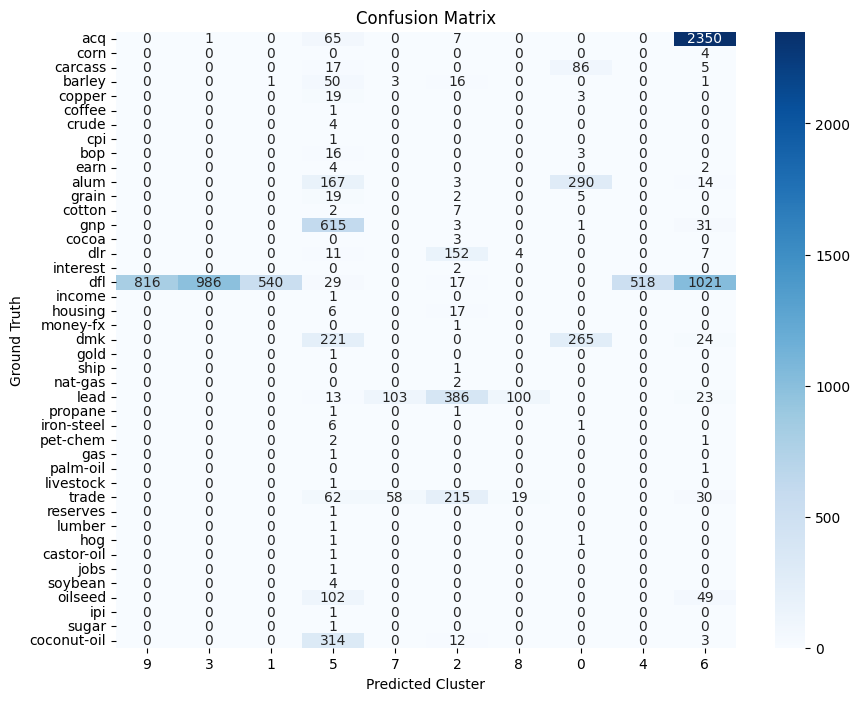

In [ ]:
# Confusion matrix
conf_matrix = pd.crosstab(df['Top_Level_Category'], df['Cluster'], rownames=['Ground Truth'], colnames=['Predicted Cluster'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Cluster'].unique(), yticklabels=df['Top_Level_Category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('Ground Truth')
plt.show()


 PART B =>


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import reuters
from nltk import download
download('reuters')


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
# Download Reuters-21578 dataset if not already downloaded
doc_ids = reuters.fileids()

# Define classes of interest
classes_of_interest = ['crude', 'interest', 'grain']

# Filter documents based on classes
documents = [(doc_id, reuters.raw(doc_id)) for doc_id in doc_ids if any(className in reuters.categories(doc_id) for className in classes_of_interest) and len(reuters.categories(doc_id)) == 1]

df = pd.DataFrame(documents, columns=['Doc_ID', 'Content'])
print(df)

            Doc_ID                                            Content
0       test/14828  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
1       test/15049  FED EXPECTED TO SET CUSTOMER REPURCHASES\n  Th...
2       test/15092  FED SETS OVERNIGHT SYSTEM REPURCHASES, FED SAY...
3       test/15096  FED ADDS RESERVES VIA OVERNIGHT REPURCHASES\n ...
4       test/15200  TURKEY CALLS FOR DIALOGUE TO SOLVE DISPUTE\n  ...
..             ...                                                ...
692  training/9841  BANK OF SPAIN PROVIDES YEAR RECORD ASSISTANCE ...
693  training/9907  DUTCH GRAIN LEVY TEST CASE TO START IN APRIL\n...
694  training/9943  FED EXPECTED TO ADD RESERVES\n  The Federal Re...
695  training/9972  FED SETS TWO BILLION DLR CUSTOMER REPURCHASE, ...
696  training/9988  FED SETS TWO BILLION DLR CUSTOMER REPURCHASE\n...

[697 rows x 2 columns]


In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Content'])


In [ ]:
print(tfidf_matrix)

  (0, 1535)	0.10107125605108705
  (0, 2075)	0.09115441971303254
  (0, 3416)	0.06046757428889609
  (0, 2145)	0.11040277047448416
  (0, 4569)	0.12009156122278063
  (0, 2328)	0.11470436421178862
  (0, 987)	0.13208753185085742
  (0, 3601)	0.0903748398643373
  (0, 3425)	0.13825430871054467
  (0, 2942)	0.06897029271692337
  (0, 2584)	0.11470436421178862
  (0, 2127)	0.06046757428889609
  (0, 2839)	0.13208753185085742
  (0, 3367)	0.2938917850601582
  (0, 722)	0.11722917117163574
  (0, 4419)	0.19969200706513388
  (0, 2333)	0.12730420810424628
  (0, 4890)	0.26417506370171484
  (0, 873)	0.13208753185085742
  (0, 3169)	0.21364357041088608
  (0, 149)	0.06897029271692337
  (0, 3900)	0.1469458925300791
  (0, 2602)	0.0986870140753667
  (0, 3133)	0.06954195548197892
  (0, 125)	0.06396250531443634
  :	:
  (696, 4989)	0.16769456486409248
  (696, 50)	0.12075074423673475
  (696, 4627)	0.13509695503102498
  (696, 2977)	0.09627918601842562
  (696, 4661)	0.13858890473611574
  (696, 580)	0.20726762488742861
  

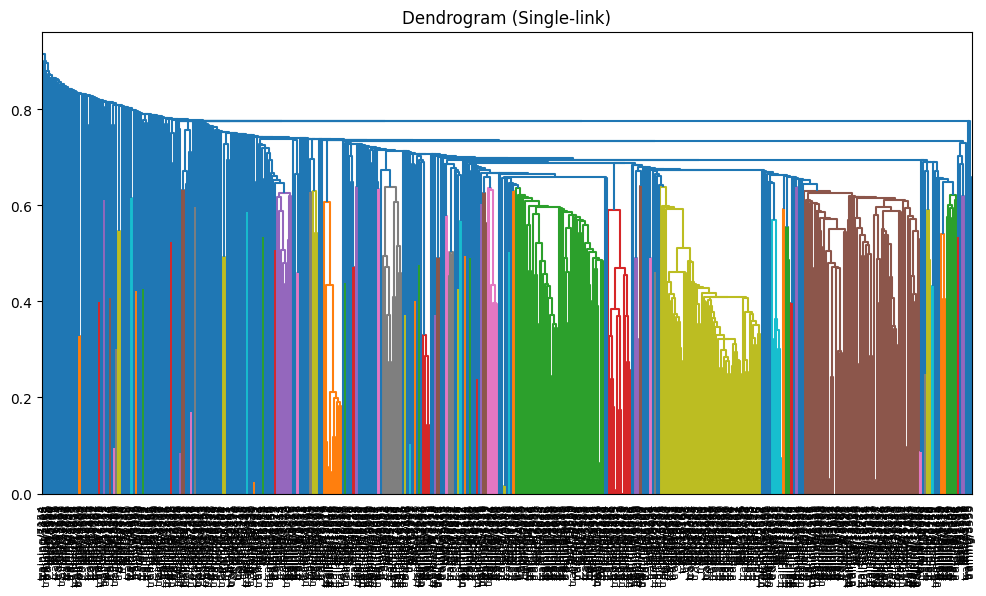

In [ ]:
# Calculate linkage matrix using single-linkage
linkage_matrix_single = sch.linkage(tfidf_matrix.toarray(), method='single', metric='cosine')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix_single, labels=df['Doc_ID'].tolist(), leaf_font_size=8)
plt.title('Dendrogram (Single-link)')
plt.show()

# Cut dendrogram to obtain K=3 clusters
single_link_clusters = sch.fcluster(linkage_matrix_single, t=2, criterion='maxclust')


In [ ]:
print(single_link_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

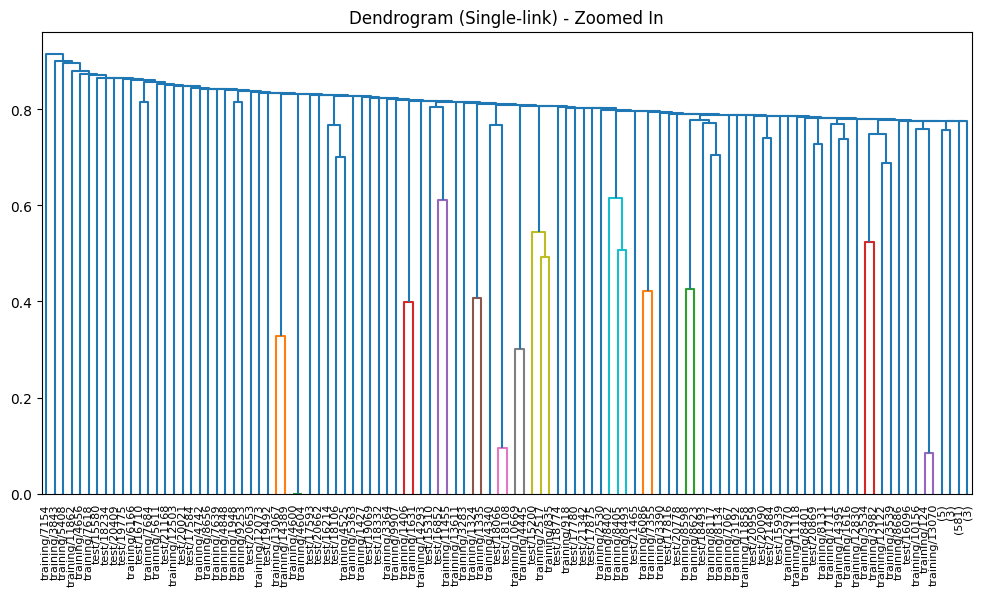

In [ ]:
# Plot dendrogram with zoom-in
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix_single, labels=df['Doc_ID'].tolist(), leaf_font_size=8, truncate_mode='level', p=75)
plt.title('Dendrogram (Single-link) - Zoomed In')
plt.show()


# # Manually create a legend
# handles = [plt.Line2D([0], [0], color=f"C{i}", label=f"Cluster {i+1}") for i in range(max(single_link_clusters))]
# plt.legend(handles=handles, title='Clusters', loc='upper right')

# plt.title('Dendrogram (Single-link) - Zoomed In with Legend')
# plt.show()


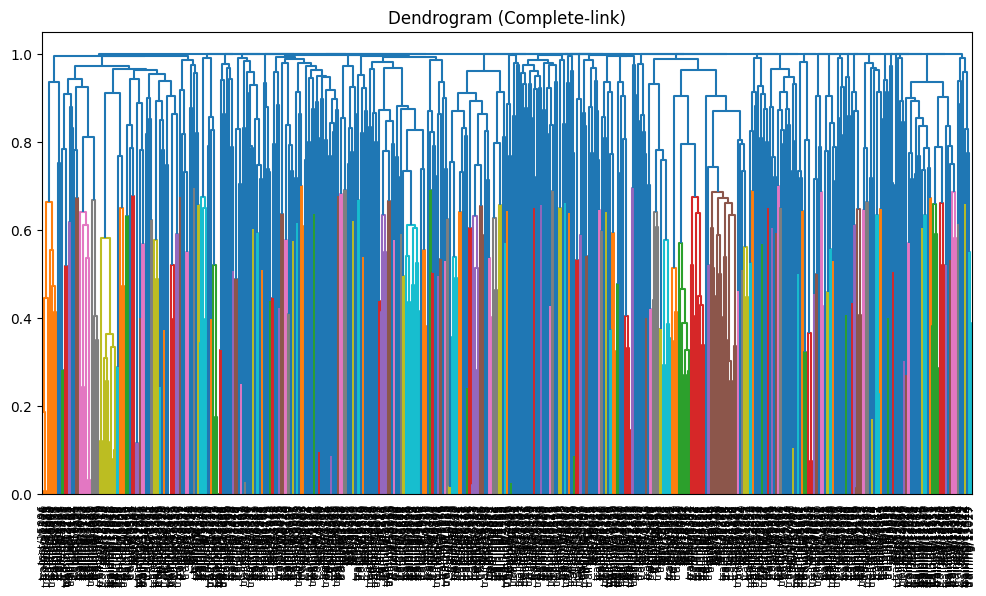

In [ ]:
# Calculate linkage matrix using complete-linkage
linkage_matrix_complete = sch.linkage(tfidf_matrix.toarray(), method='complete', metric='cosine')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix_complete, labels=df['Doc_ID'].tolist(), leaf_font_size=8)
plt.title('Dendrogram (Complete-link)')
plt.show()

# Cut dendrogram to obtain K=3 clusters
complete_link_clusters = sch.fcluster(linkage_matrix_complete, t=2, criterion='maxclust')


In [ ]:
print(complete_link_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

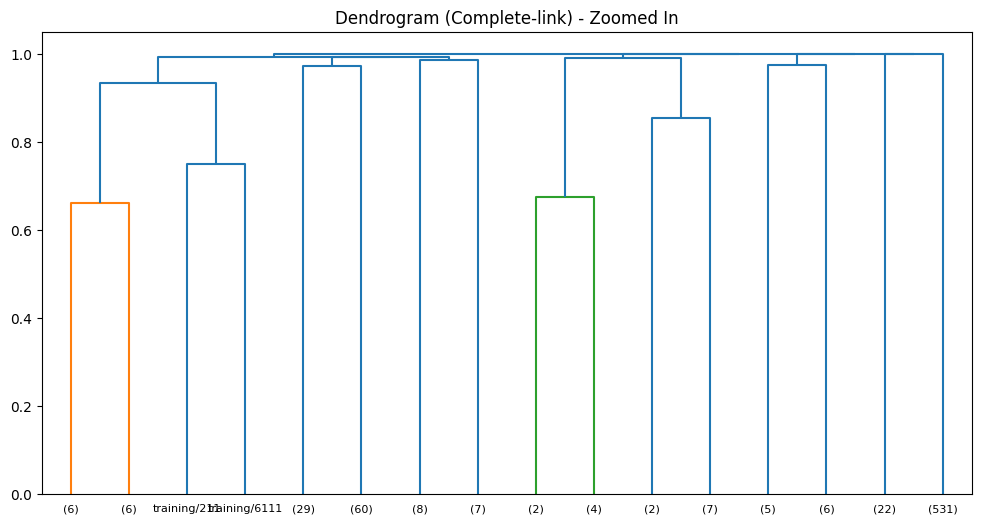

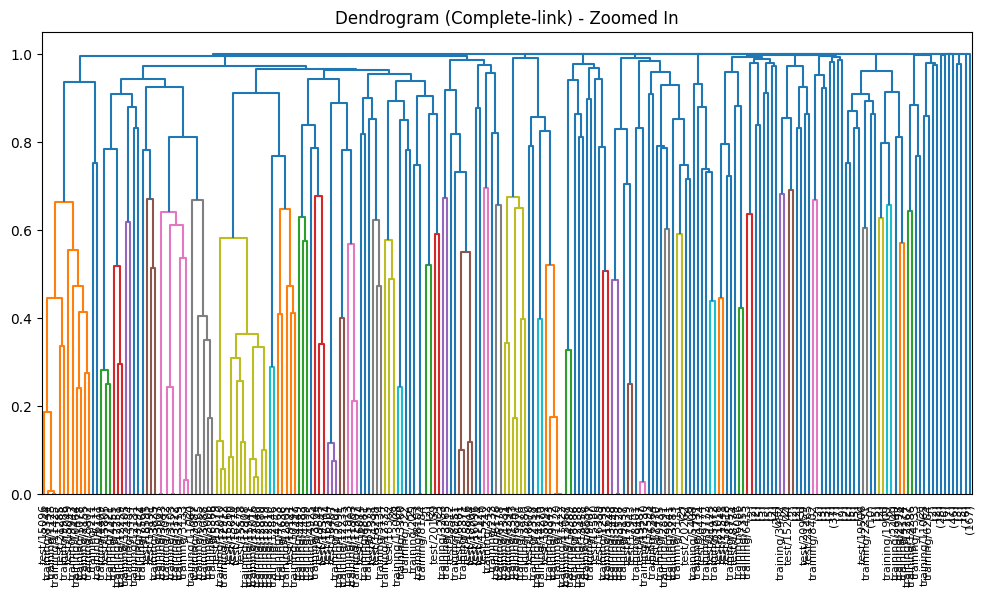

In [ ]:
# Plot dendrogram with zoom-in for Complete-link clustering
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix_complete, labels=df['Doc_ID'].tolist(), leaf_font_size=8, truncate_mode='level', p=3)
plt.title('Dendrogram (Complete-link) - Zoomed In')
plt.show()

# Plot dendrogram with zoom-in for Complete-link clustering
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix_complete, labels=df['Doc_ID'].tolist(), leaf_font_size=8, truncate_mode='level', p=10)
plt.title('Dendrogram (Complete-link) - Zoomed In')
plt.show()





In [ ]:
# GAAC Clustering
gaac_model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
gaac_clusters = gaac_model.fit_predict(tfidf_matrix.toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
print(gaac_clusters)

[2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 0 2
 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 

In [ ]:
from sklearn.cluster import KMeans

# Centroid Clustering using KMeans
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
centroid_clusters = kmeans_model.fit_predict(tfidf_matrix.toarray())



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(centroid_clusters)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 2 1 1 0 0 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 1 1 1 0 1 0 1 2 1 2 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 2 0 0 1 0 0 0 2 2 2 0 0 0 0 0
 0 2 2 2 0 0 0 2 0 0 0 0 0 0 2 2 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 2 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 0
 0 0 0 0 0 2 0 2 2 0 2 2 0 1 0 1 2 2 1 0 0 0 2 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 2 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 2 2 1 0 1 1
 1 0 2 0 0 0 2 2 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 2 0 0 0 2 0 0 0 0 0 

method 2: for centroid clustering

In [ ]:
# from scipy.cluster.hierarchy import linkage, fcluster

# # Calculate linkage matrix using centroid linkage
# linkage_matrix_centroid = linkage(tfidf_matrix.toarray(), method='centroid', metric='cosine')

# # Cut dendrogram to obtain K=3 clusters for centroid linkage
# centroid_clusters = fcluster(linkage_matrix_centroid, t=3, criterion='maxclust')

#this needs distance metric to be euclidean, and not cosine


ValueError: ignored

In [ ]:
# True labels based on ground truth classes
true_labels = [reuters.categories(doc_id)[0] for doc_id in df['Doc_ID']]

# Compute Rand index for each clustering method
rand_index_single = adjusted_rand_score(true_labels, single_link_clusters)
rand_index_complete = adjusted_rand_score(true_labels, complete_link_clusters)
rand_index_gaac = adjusted_rand_score(true_labels, gaac_clusters)
rand_index_centroid = adjusted_rand_score(true_labels, centroid_clusters)

# Print Rand indices
print(f'Rand Index (Single-link): {rand_index_single:.4f}')
print(f'Rand Index (Complete-link): {rand_index_complete:.4f}')
print(f'Rand Index (GAAC): {rand_index_gaac:.4f}')
print(f'Rand Index (Centroid): {rand_index_centroid:.4f}')


Rand Index (Single-link): 0.0039
Rand Index (Complete-link): 0.0000
Rand Index (GAAC): 0.1819
Rand Index (Centroid): 0.3409


centroid performs the best for the given dataset and assumed ground truth

//OPTIONAL CODE: SEE IF YOU CAN RUN THIS TO GET A COMPARISON BETWEEN K-MEANS AND HAC CLUSTERING

In [ ]:
# from sklearn.cluster import KMeans, AgglomerativeClustering
# from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score
# import time

# # Assume df is your DataFrame with features

# # K-Means
# start_time = time.time()
# kmeans_model = KMeans(n_clusters=3, random_state=42)
# kmeans_clusters = kmeans_model.fit_predict(df)
# kmeans_time = time.time() - start_time

# # HAC
# start_time = time.time()
# hac_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# hac_clusters = hac_model.fit_predict(df[['Content']])
# hac_time = time.time() - start_time

# # Evaluate and compare metrics
# kmeans_purity = accuracy_score(df['Ground_Truth'], kmeans_clusters)
# kmeans_nmi = normalized_mutual_info_score(df['Ground_Truth'], kmeans_clusters)
# kmeans_f1 = f1_score(df['Ground_Truth'], kmeans_clusters, average='weighted')
# kmeans_ari = adjusted_rand_score(df['Ground_Truth'], kmeans_clusters)

# hac_purity = accuracy_score(true_labels, hac_clusters)
# hac_nmi = normalized_mutual_info_score(true_labels, hac_clusters)
# hac_f1 = f1_score(true_labels, hac_clusters, average='weighted')
# hac_ari = adjusted_rand_score(true_labels, hac_clusters)

# print("K-Means Metrics:")
# print(f"Purity: {kmeans_purity:.4f}")
# print(f"NMI: {kmeans_nmi:.4f}")
# print(f"F1 Score: {kmeans_f1:.4f}")
# print(f"ARI: {kmeans_ari:.4f}")
# print(f"Execution Time: {kmeans_time:.4f} seconds")

# print("\nHAC Metrics:")
# print(f"Purity: {hac_purity:.4f}")
# print(f"NMI: {hac_nmi:.4f}")
# print(f"F1 Score: {hac_f1:.4f}")
# print(f"ARI: {hac_ari:.4f}")
# print(f"Execution Time: {hac_time:.4f} seconds")
